# **SMS Spam Classifier**

## Basic data preprocessing

In [66]:
# nltk.download('stopwords')
# nltk.download('punkt')

In [67]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.preprocessing import LabelEncoder

In [68]:
# importing dataset

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1785,ham,I dun believe u. I thk u told him.,NaN,NaN,NaN
1191,ham,Come to my home for one last time i wont do an...,NaN,NaN,NaN
2932,ham,Yo do you know anyone &lt;#&gt; or otherwise...,NaN,NaN,NaN
1512,ham,"Hey sweet, I was wondering when you had a mome...",NaN,NaN,NaN
3647,ham,As per your request 'Maangalyam (Alaipayuthe)'...,NaN,NaN,NaN


In [69]:
# checking the shape of data

df.shape

(5572, 5)

In [70]:
# checking info of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [71]:
# checking for null values

round((df.isnull().sum()/df.shape[0])*100, 2)

v1             0.00
v2             0.00
Unnamed: 2    99.10
Unnamed: 3    99.78
Unnamed: 4    99.89
dtype: float64

In [72]:
# Since these columns has 99% of null values we will have to remove them

In [73]:
# dropping null values

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [74]:
# again checking for null values

df.isnull().sum()

v1    0
v2    0
dtype: int64

In [75]:
# chcking for duplicate values

df.duplicated().sum()

403

In [76]:
# dropping all duplicate values

df.drop_duplicates(inplace=True)

In [77]:
# renaming columns

df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)

In [78]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
# label encoding target variable

label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [80]:
df.sample(5)

,Target,Text
751,1,You have an important customer service announc...
1475,0,Nice. Wait...should you be texting right now? ...
2163,0,hi my darlin im on my way to London and we hav...
2052,1,Call 09094100151 to use ur mins! Calls cast 10...
4320,0,"K, jason says he's gonna be around so I'll be ..."


## EDA

In [81]:
# checking value counts for target variable

print(df['Target'].value_counts())

Target
0    4516
1     653
Name: count, dtype: int64


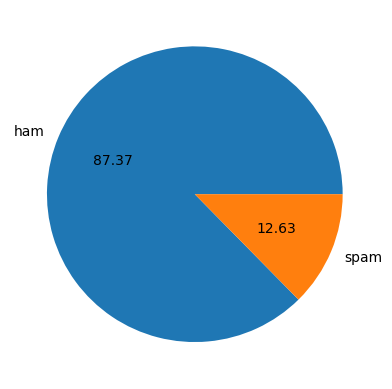

In [82]:
# plotting value counts

plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [83]:
# dataset is imbalanced

In [84]:
#creating some new features

df['num_charector'] = df['Text'].apply(len)
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [85]:
# new df

df.head()

,Target,Text,num_charector,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [86]:
# describe for each column

df[['num_charector', 'num_words', 'num_sentences']].describe()

,num_charector,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [87]:
# target wise descriptions of columns

df[df['Target']==0][['num_charector', 'num_words', 'num_sentences']].describe()

,num_charector,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
# target wise descriptions of columns

df[df['Target']==1][['num_charector', 'num_words', 'num_sentences']].describe()

,num_charector,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


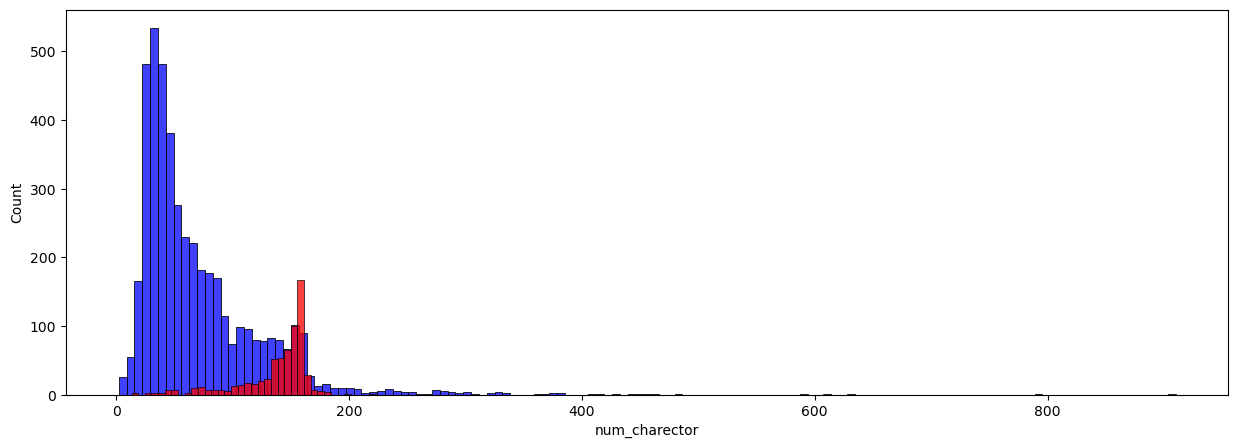

In [89]:
# plotting newly created features

# number of charectors
plt.figure(figsize=(15, 5))
sns.histplot(df[df['Target']==0]['num_charector'], color='blue')
sns.histplot(df[df['Target']==1]['num_charector'], color='red')
plt.show()

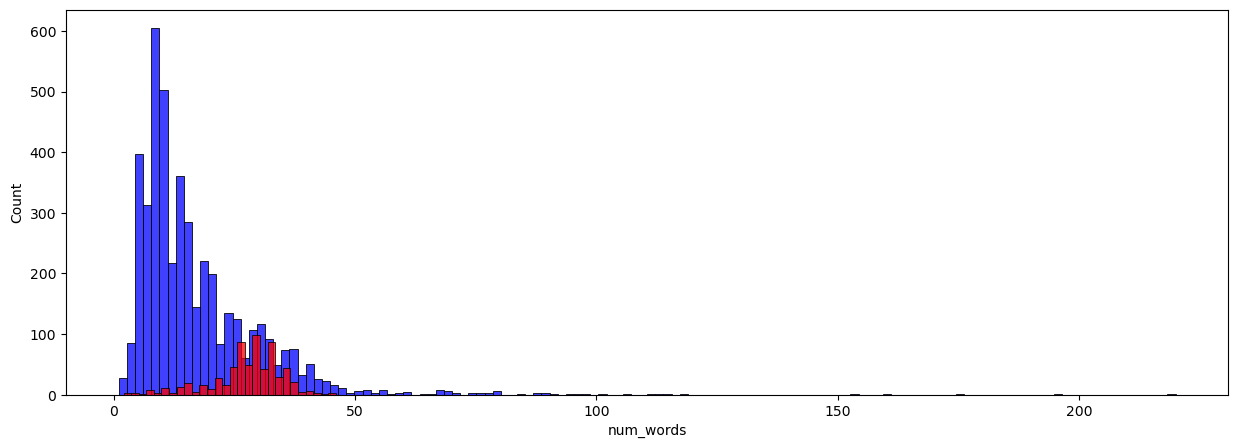

In [90]:
# number of words
plt.figure(figsize=(15, 5))
sns.histplot(df[df['Target']==0]['num_words'], color='blue')
sns.histplot(df[df['Target']==1]['num_words'], color='red')
plt.show()

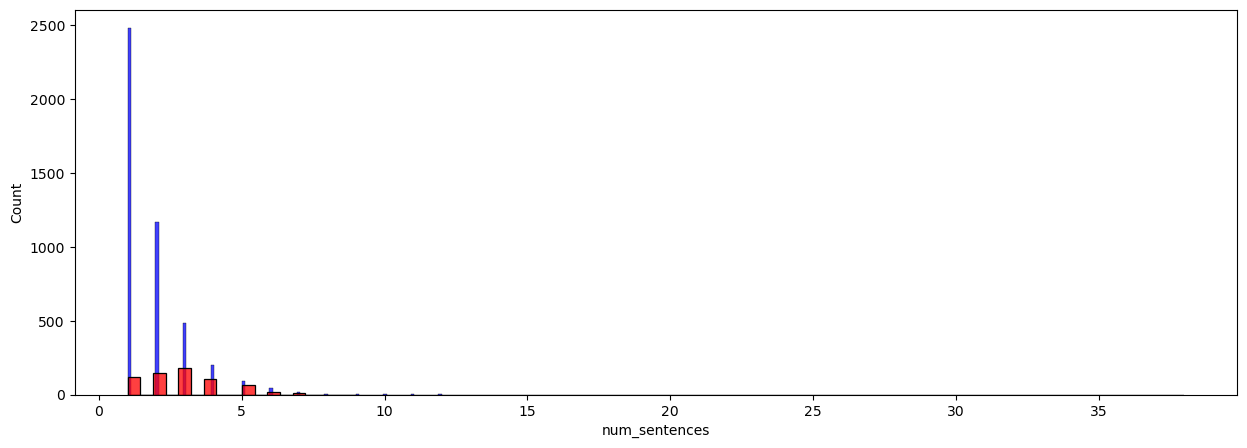

In [91]:
# number of sentences
plt.figure(figsize=(15, 5))
sns.histplot(df[df['Target']==0]['num_sentences'], color='blue')
sns.histplot(df[df['Target']==1]['num_sentences'], color='red')
plt.show()

c:\Users\masan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


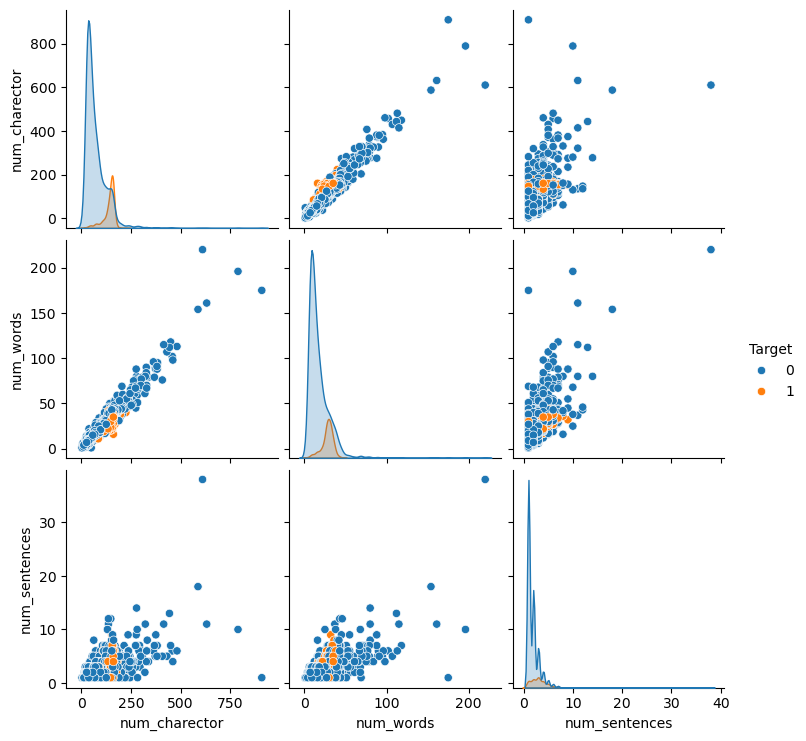

In [92]:
# plotting a pairplot

sns.pairplot(df, hue='Target')
plt.show()

<Axes: >

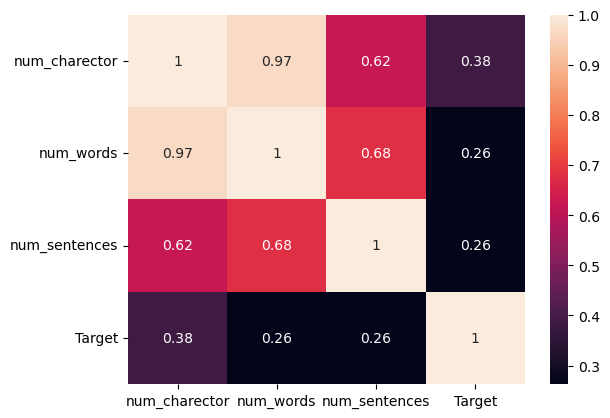

In [93]:
sns.heatmap(df[['num_charector', 'num_words', 'num_sentences', 'Target']].corr(), annot=True)

In [94]:
# since num_charector, num_words, num_sentences has high correlation among them 
# so to avoid multicolinearity we will have to put only one of them
# since num_charector has high correlation with target variable we will only put num_charector.

## Text Preprocessing

In [95]:
# class for stemming text

porterstemmer = PorterStemmer()

In [96]:
# function for applying preprocessing on text

def preprocessed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    x = []
    for i in text:
        if i.isalnum():
            x.append(i)

    text = x[:]        
    x.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)

    text = x[:]        
    x.clear()     

    for i in text:  
        x.append(porterstemmer.stem(i))
    
    return " ".join(x)


In [97]:
# applying preprocessed_text

df['Text'] = df['Text'].apply(preprocessed_text)

In [98]:
# new df

df.head()

,Target,Text,num_charector,num_words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


In [99]:
# making wordcloud of genuine text

from wordcloud import WordCloud

wc = WordCloud(width=750, height=500, min_font_size=10, background_color='white')
word_cloud = wc.generate(df[df['Target']==0]['Text'].str.cat(sep=" "))

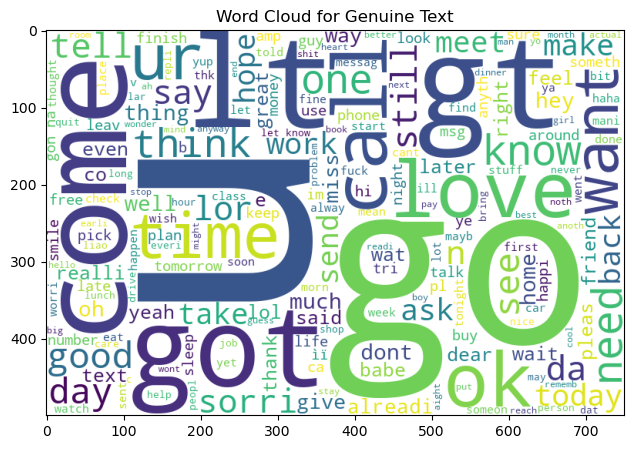

In [108]:
# plotting wordcloud

plt.figure(figsize=(25, 5))
plt.imshow(word_cloud)
plt.title('Word Cloud for Genuine Text')
plt.show()

In [109]:
# making wordcloud of Spam text

wc = WordCloud(width=750, height=500, min_font_size=10, background_color='white')
word_cloud = wc.generate(df[df['Target']==1]['Text'].str.cat(sep=" "))

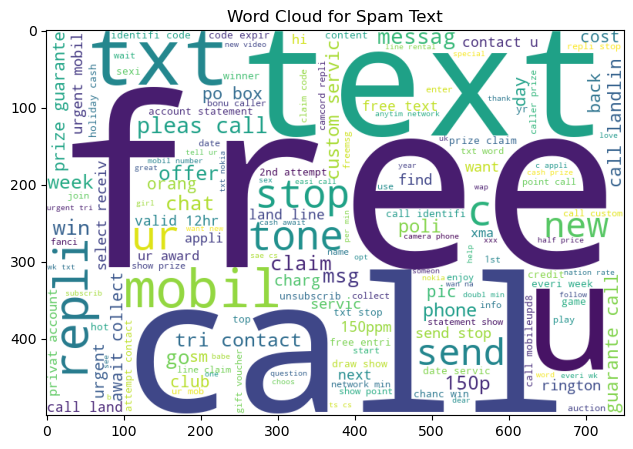

In [148]:
# plotting wordcloud of spam text

plt.figure(figsize=(25, 5))
plt.imshow(word_cloud)
plt.title('Word Cloud for Spam Text')
plt.show()

In [116]:
# making list of words in spam texts

spam_corpus = []

for text in df[df['Target']==1]['Text'].tolist():
    for word in text.split():
        spam_corpus.append(word)

In [117]:
len(spam_corpus)

9939

In [120]:
# creating counter object for counting each word in spam text

from collections import Counter 
counter = Counter(spam_corpus)

0

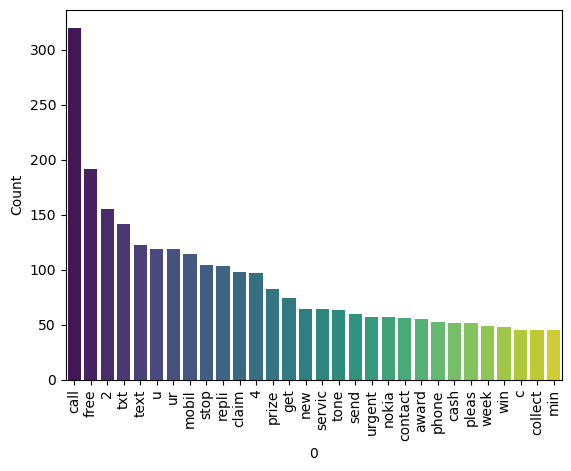

In [141]:
# plotting most common 30 words 

sns.barplot(x=pd.DataFrame(counter.most_common(30))[0], y=pd.DataFrame(counter.most_common(30))[1], 
            palette="viridis", hue=pd.DataFrame(counter.most_common(30))[0], legend=False)
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

In [144]:
# creating list for words in ham text

ham_corpus = []

for text in df[df['Target']==0]['Text'].tolist():
    for word in text.split():
        ham_corpus.append(word)

In [145]:
len(ham_corpus)

35404

In [146]:
# counter object for ham_corpus

counter = Counter(ham_corpus)

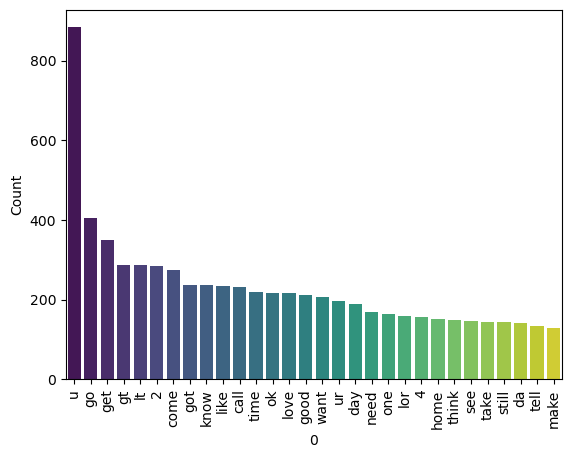

In [149]:
# plotting most common 30 words in ham texts

sns.barplot(x=pd.DataFrame(counter.most_common(30))[0], y=pd.DataFrame(counter.most_common(30))[1], 
            palette="viridis", hue=pd.DataFrame(counter.most_common(30))[0], legend=False)
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

## Model Building

In [214]:
# importing all necessary libraries for model building

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle

In [184]:
# applying tfidf vectorizer

tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['Text']).toarray()

In [185]:
X.shape

(5169, 3000)

In [186]:
y = df['Target'].values

In [187]:
y.shape

(5169,)

In [188]:
# splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
# creating objects for each algorithm

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [190]:
# creating gaussianNB model

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8607350096711799
0.5020746887966805


In [191]:
# creating multinomialNB model

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9729206963249516
0.9915966386554622


In [192]:
# creating bernoullibNB model

bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9729206963249516
0.9606299212598425


In [196]:
# creating objects of all classification models

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [200]:
# creating dictionary classification models with their names

classifiers = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [199]:
def train_classifier(clm ,X_train, y_train, X_test, y_test):
    clm.fit(X_train, y_train)
    y_pred = clm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [204]:
classifiers_list = []
accuracies = []
precisions = []

for names, clm in classifiers.items():
    accuracy, precision = train_classifier(clm ,X_train, y_train, X_test, y_test)
    accuracies.append(accuracy)
    precisions.append(precision)
    classifiers_list.append(names)

c:\Users\masan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [206]:
# creating dataframe

model_df = pd.DataFrame({'Classifier': classifiers_list, 'Accuracy': accuracies, 'Precision':precisions})

In [207]:
model_df

,Classifier,Accuracy,Precision
0,SVC,0.976789,0.954887
1,KN,0.904255,1.000000
2,NB,0.972921,0.991597
3,DT,0.933269,0.827586
4,LR,0.946809,0.868852
5,RF,0.971954,0.975410
6,AdaBoost,0.950677,0.867188
7,BgC,0.962282,0.884058
8,ETC,0.977756,0.984127
9,GBDT,0.946809,0.968750


In [209]:
# melting dataframe for plotting bargraph

model_df1 = pd.melt(model_df, id_vars = "Classifier")

In [210]:
model_df1

,Classifier,variable,value
0,SVC,Accuracy,0.976789
1,KN,Accuracy,0.904255
2,NB,Accuracy,0.972921
3,DT,Accuracy,0.933269
4,LR,Accuracy,0.946809
5,RF,Accuracy,0.971954
6,AdaBoost,Accuracy,0.950677
7,BgC,Accuracy,0.962282
8,ETC,Accuracy,0.977756
9,GBDT,Accuracy,0.946809


c:\Users\masan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


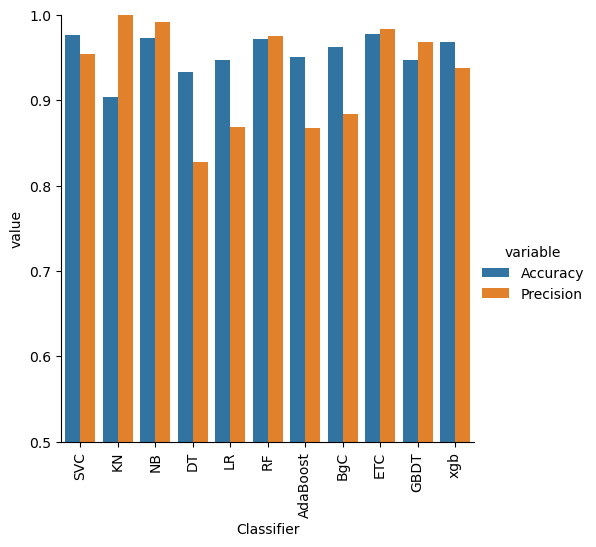

In [211]:
# plotting accuracies

sns.catplot(x = 'Classifier', y='value', 
               hue = 'variable',data=model_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [212]:
# there is NB model with high accuracy and high precision so we will go with it

In [217]:
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('mnb.pkl', 'wb'))